In [64]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import import_ipynb

In [65]:
path = '/home/rei/reigit/avpdemo.txt'
f = open(path)
f.close()
with open(path) as f:
    l = f.readlines()
    
S = l.index('Nodes:\n')
E = l.index('Publishers:\n')
no=[]
for i in l[S+3:E-1]:
    no.append(i.split()[4])
print(no)

['bridge', 'robot_state_publisher', 'lgsvl_interface_node', 'transform_listener_impl_55b98c816140', 'ndt_map_publisher_node', 'p2d_ndt_localizer_node', 'mpc_controller_node', 'filter_transform_vlp16_front', 'euclidean_cluster_cloud_node', 'lanelet2_global_planner_node', 'ray_ground_classifier', 'lanelet2_map_provider_node', 'off_map_obstacles_filter_node', 'point_cloud_fusion_nodes', 'lanelet2_map_visualizer_node', 'lane_planner_node', 'filter_transform_vlp16_rear', 'behavior_planner_node', 'parking_planner_node', 'voxel_grid_cloud_node', 'object_collision_estimator_node', 'transform_listener_impl_55d85bb31530', 'transform_listener_impl_56475af99a70', 'rviz2', 'rosbridge_server_node', 'transform_listener_impl_561ebe6eab90', 'transform_listener_impl_561ebe776630']


In [66]:
#plot a label
def label(latency):
    return 'max:{:.02f}us, min:{:.02f}us,\n mean:{:.02f}us, sam:{}'.format(max(latency), min(latency), np.mean(latency), len(latency))
    #return 'max:{:.02f}us, mean:{:.02f}us'.format(max(latency),np.mean(latency))
#plot a graph
def graph(latency, title):
    fig, ax = plt.subplots(1, 1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.hist(latency, bins=200, label=label(latency))
    plt.legend()
    plt.title("%s"%title, fontsize=15)
    plt.xlabel("Latency [us]", fontsize=15)
    plt.ylabel("Sample", fontsize=15)
    plt.savefig("%s"%title+".pdf")

In [67]:
from topic import cb,cbd,ps_com,node_com
# callback of node
node=['point_cloud_fusion_nodes','ray_ground_classifier','euclidean_cluster_cloud_node','off_map_obstacles_filter_node','object_collision_estimator_node','behavior_planner_node','mpc_controller_node']
for i in node:
    print(i)
    cb(i)

point_cloud_fusion_nodes
sub: ['/parameter_events', '/lidar_front/points_filtered', '/lidar_rear/points_filtered', '/lidar_front/points_filtered', '/lidar_front/points_filtered', '/lidar_front/points_filtered', '/lidar_front/points_filtered', '/lidar_front/points_filtered', '/lidar_front/points_filtered']
pub: ['/rosout', '/parameter_events', '/lidars/points_fused']
service: ['/lidars/point_cloud_fusion_nodes/get_parameters', '/lidars/point_cloud_fusion_nodes/get_parameter_types', '/lidars/point_cloud_fusion_nodes/set_parameters', '/lidars/point_cloud_fusion_nodes/set_parameters_atomically', '/lidars/point_cloud_fusion_nodes/describe_parameters', '/lidars/point_cloud_fusion_nodes/list_parameters']
client: []
ray_ground_classifier
sub: ['/parameter_events', '/lidars/points_fused']
pub: ['/rosout', '/parameter_events', '/perception/points_ground', '/perception/points_nonground']
service: ['/perception/ray_ground_classifier/get_parameters', '/perception/ray_ground_classifier/get_parameter

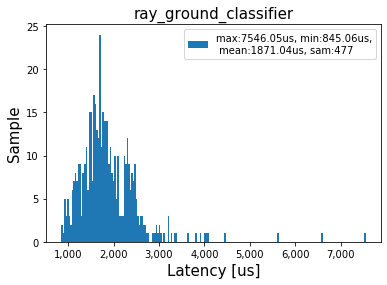

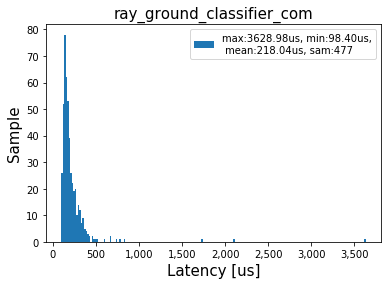

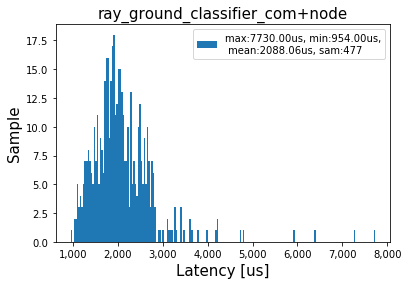

In [68]:
# callback duration of node: node name,topic name
node='ray_ground_classifier'
topic='/lidars/points_fused'
cbduration1,title = cbd(node,topic)
graph(cbduration1,title)
# com latency
comlatency1,title=ps_com(node,topic)
graph(comlatency1,title)
# node latency + com latency
node_com_latency1=node_com(cbduration1,comlatency1)
graph(node_com_latency1,title+'+node')

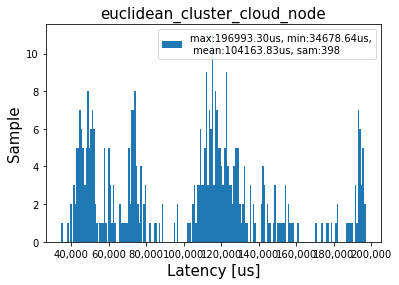

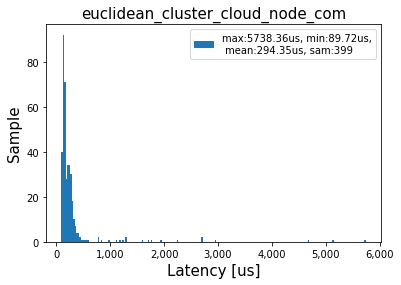

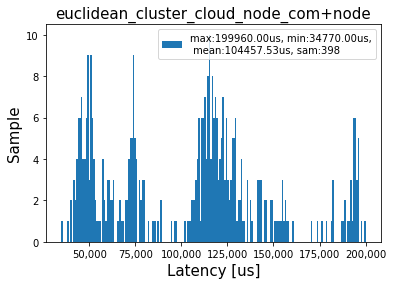

In [69]:
# callback duration of node: node name,topic name
node='euclidean_cluster_cloud_node'
topic='/perception/points_nonground'
cbduration2,title = cbd(node,topic)
for i in cbduration2:
    if i > 200000:
        cbduration2.remove(i)
graph(cbduration2,title)
# com latency
comlatency2,title=ps_com(node,topic)
graph(comlatency2,title)
# node latency + com latency
node_com_latency2=node_com(cbduration2,comlatency2)
graph(node_com_latency2,title+'+node')

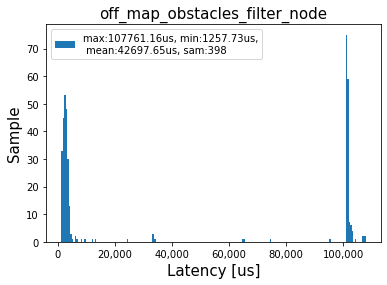

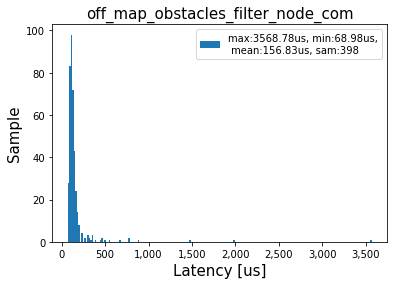

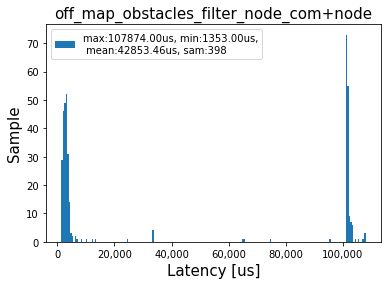

In [70]:
# callback duration of node: node name,topic name
node='off_map_obstacles_filter_node'
topic='/perception/lidar_bounding_boxes'
cbduration3,title = cbd(node,topic)
graph(cbduration3,title)
# com latency
comlatency3,title=ps_com(node,topic)
graph(comlatency3,title)
# node latency + com latency
node_com_latency3=node_com(cbduration3,comlatency3)
graph(node_com_latency3,title+'+node')

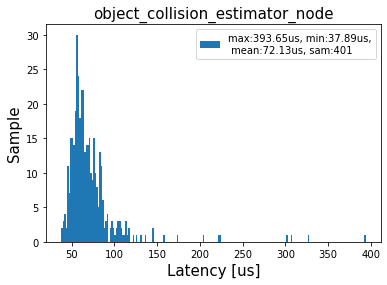

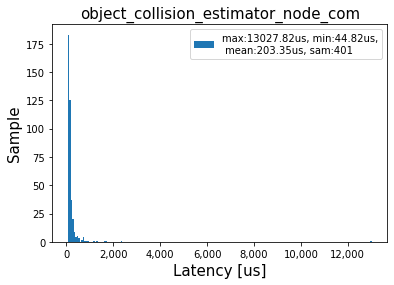

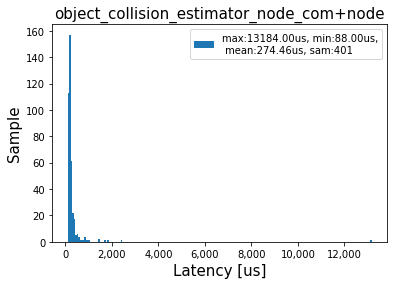

In [71]:
# callback duration of node: node name,topic name
node='object_collision_estimator_node'
topic='/perception/lidar_bounding_boxes_filtered'
cbduration4,title = cbd(node,topic)
graph(cbduration4,title)
# com latency
comlatency4,title=ps_com(node,topic)
graph(comlatency4,title)
# node latency + com latency
node_com_latency4=node_com(cbduration4,comlatency4)
graph(node_com_latency4,title+'+node')

service:client:service name
['0x561d3740ae50:object_collision_estimator_node--0x561705dffb60:behavior_planner_node--/planning/estimate_collision']
right output!


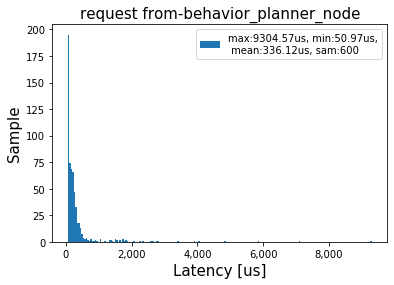

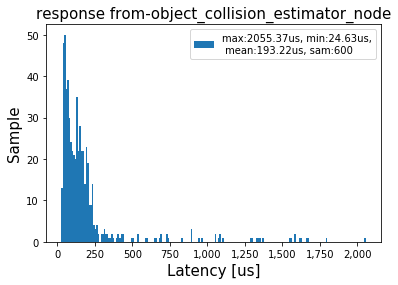

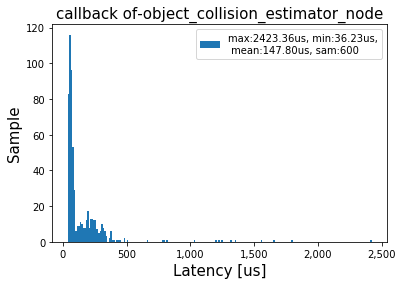

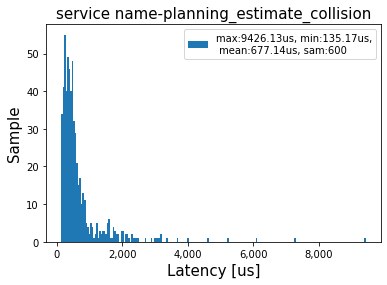

In [72]:
from service import req,res,ser_cb,check,pair
print('service:client:service name')
pairs=pair()
print(pairs)
for i in pairs:
    request_latency5=req(i.split(':')[0].upper().replace('X', 'x'))
    graph(request_latency5, "request from-"+i.split('--')[1].split(':')[1].split('--')[0])
    response_latency5=res(i.split('--')[1].split(':')[0].upper().replace('X', 'x'))
    graph(response_latency5, "response from-"+i.split(':')[1].split('--')[0])
    cbduration5=ser_cb(str(int(i.split(':')[0],16)))
    graph(cbduration5, "callback of-"+i.split(':')[1].split('--')[0])
    service_latency5 = [request_latency5[j]+response_latency5[j]+cbduration5[j] for j in range(min(len(request_latency5),len(response_latency5),len(cbduration5)))]
    graph(service_latency5, "service name-"+i.split('/')[1]+'_'+i.split('/')[2])
    check(service_latency5,request_latency5,response_latency5,cbduration5)

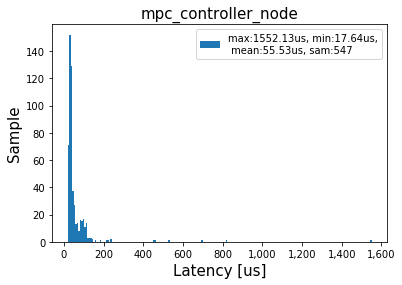

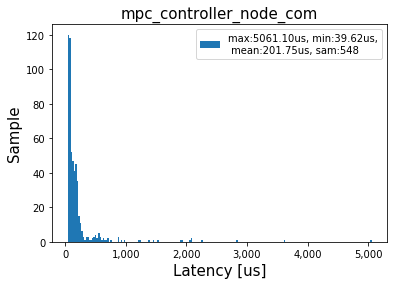

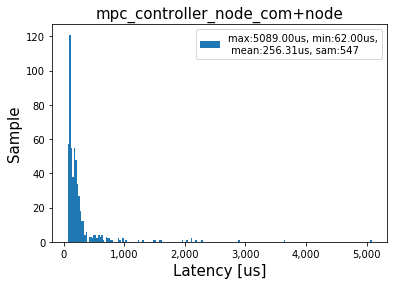

In [73]:
# callback duration of node: node name,topic name
node='mpc_controller_node'
topic='/planning/trajectory'
cbduration6,title = cbd(node,topic)
for i in cbduration6:
    if i > 200000:
        cbduration6.remove(i)
graph(cbduration6,title)
# com latency
comlatency6,title=ps_com(node,topic)
graph(comlatency6,title)
# node latency + com latency
node_com_latency6=node_com(cbduration6,comlatency6)
graph(node_com_latency6,title+'+node')

62.468513853904284
100.0


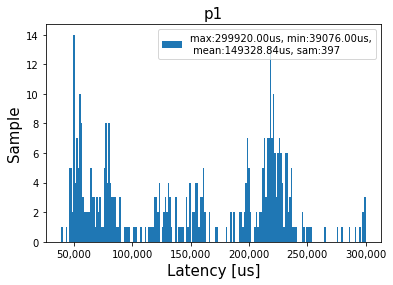

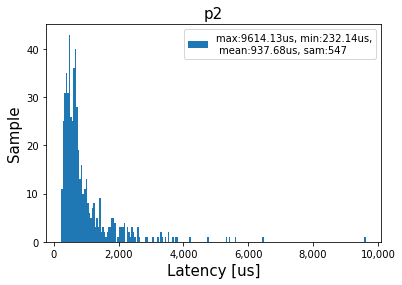

In [74]:
# add 1234
p1 = [node_com_latency1[i]+node_com_latency2[i]+node_com_latency3[i]+node_com_latency4[i] for i in range(min(len(node_com_latency1),len(node_com_latency2),len(node_com_latency3),len(node_com_latency4)))]
for i in p1:
    if i > 300000:
        p1.remove(i)
graph(p1,'p1')
n = sum(i<200000 for i in p1)
print(100*n/len(p1))
# add 56
p2 = [service_latency5[i]+node_com_latency6[i] for i in range(min(len(service_latency5),len(node_com_latency6)))]
graph(p2,'p2')
n = sum(i<200000 for i in p2)
print(100*n/len(p2))

0.9835489203763307
5999 0.0015035066472032013


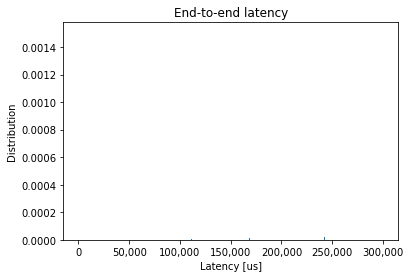

In [12]:
# convolution integral
import numpy as np
import matplotlib.pyplot as plt
def convo(p1,p2):
    bin=50
    x1= np.arange(bin,max(p1)+bin,bin)
    #print(x1,len(x1))
    x2= np.arange(bin,max(p2)+bin,bin)
    #print(x2,len(x2))
    if len(x1) > len(x2):
        x=x1
    else:
        x=x2
    
    #P1
    P1=[]
    for i in x:
        l=0
        for j in p1:
            if (j < i)&(j > i-bin):
                l+=1
        l/= len(p1)
        P1.append(l)

    #P2
    P2=[]
    for i in x:
        l=0
        for j in p2:
            if (j < i)&(j > i-bin):
                l+=1
        l/= len(p2)
        P2.append(l)
    
    #P1+P2
    P = [] 
    for i in range(len(x)):
        p12 = 0
        for t in range(i):
            p12+= P1[t]*(P2[i-t] + P2[i-t-1])/2.0        
        P.append(p12)
    return x,P

# add 1234 to 56
x,p=convo(p1,p2)
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('End-to-end latency')
plt.xlabel('Latency [us]')
plt.ylabel('Distribution')
plt.bar(x,p)
plt.savefig("e2elatency.pdf")

k=0
for i in p:
    k+=i
print(k)
print(len(x),max(p))

In [13]:
from action import get_timestamp,send_timestamp
# action latency
action_latency = [int(get_timestamp[i])-int(send_timestamp[i]) for i in range(min(len(get_timestamp),len(send_timestamp)))]
for i in action_latency:
    i=i/1000
    print(str(i)+' us')
print(send_timestamp,get_timestamp)

importing Jupyter notebook from action.ipynb
94683481026128:/planning/estimate_collision--600
94864481839632:/had_maps/HAD_Map_Service--6
94832173285216:/planning/plan_lane_trajectory/_action/send_goal--1
94832173285232:/planning/plan_lane_trajectory/_action/get_result--1
94322865568000:/planning/plan_parking_trajectory/_action/send_goal--1
94322865568016:/planning/plan_parking_trajectory/_action/get_result--1
94729055262288:/had_maps/HAD_Map_Service--1
94387741707344:/had_maps/HAD_Map_Service--1
94322865305360:/had_maps/HAD_Map_Service--1
94832173006016:/had_maps/HAD_Map_Service--1
139961240727904:/had_maps/HAD_Map_Service--1
94656882958896:/planning/plan_lane_trajectory/_action/send_goal--1
94656882958912:/planning/plan_lane_trajectory/_action/get_result--1
94656883378480:/planning/plan_parking_trajectory/_action/send_goal--1
94656882796928:/had_maps/HAD_Map_Service--1
94656882801504:/planning/estimate_collision--600
service:client:service name
['0x561d3740ae50:0x561705dffb60:/planni

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# # maximum
# def maxi(l1,l2):
#     if max(l1) > max(l2):
#         maximum=max(l1)
#     else:
#         maximum=max(l2)
#     return maximum

# # discretization
# def disc(maximum,latency):
#     bin=100
#     x= np.arange(bin,maximum+bin,bin)
#     P=[]
#     for i in x:
#         l=0
#         for j in latency:
#             if (j < i)&(j > i-bin):
#                 l+=1
#         l/= len(latency)
#         P.append(l)
        
#     return x,P

# # convolution integral
# def convo(p1,p2):
#     P = [] 
#     for i in range(len(p1)):
#         p12 = 0
#         for t in range(i):
#             p12+= p1[t]*(p2[i-t] + p2[i-t-1])/2.0        
#         P.append(p12)
    
#     return P

# # add 12345 to 6
# maximum=maxi(node_com_latency,node_com_latency6)
# x,p1=disc(maximum,node_com_latency)
# x,p2=disc(maximum,node_com_latency6)
# print(len(p1),len(p2))
# p=convo(p1,p2)
# fig, ax = plt.subplots(1, 1)
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# plt.title('End-to-end latency')
# plt.xlabel('Latency [us]')
# plt.ylabel('Distribution')
# plt.bar(x,p)
# plt.savefig("End-to-end latency.pdf")

# k=0
# for i in p1:
#     k+=i
# print(k)
# k=0
# for i in p2:
#     k+=i
# print(k)
# k=0
# for i in p:
#     k+=i
# print(k)
# print(len(x),max(p))

In [15]:
from topic import cb,cbd,ps_com,node_com
# callback of node
print(no)
node=['point_cloud_fusion_nodes','voxel_grid_cloud_node','p2d_ndt_localizer_node','lanelet2_global_planner_node','behavior_planner_node','mpc_controller_node','']
for i in node:
    print(i)
    cb(i)

['bridge', 'robot_state_publisher', 'lgsvl_interface_node', 'transform_listener_impl_55b98c816140', 'ndt_map_publisher_node', 'p2d_ndt_localizer_node', 'mpc_controller_node', 'filter_transform_vlp16_front', 'euclidean_cluster_cloud_node', 'lanelet2_global_planner_node', 'ray_ground_classifier', 'lanelet2_map_provider_node', 'off_map_obstacles_filter_node', 'point_cloud_fusion_nodes', 'lanelet2_map_visualizer_node', 'lane_planner_node', 'filter_transform_vlp16_rear', 'behavior_planner_node', 'parking_planner_node', 'voxel_grid_cloud_node', 'object_collision_estimator_node', 'transform_listener_impl_55d85bb31530', 'transform_listener_impl_56475af99a70', 'rviz2', 'rosbridge_server_node', 'transform_listener_impl_561ebe6eab90', 'transform_listener_impl_561ebe776630']
point_cloud_fusion_nodes
sub: ['/parameter_events', '/lidar_front/points_filtered', '/lidar_rear/points_filtered', '/lidar_front/points_filtered', '/lidar_front/points_filtered', '/lidar_front/points_filtered', '/lidar_front/p

IndexError: list index out of range

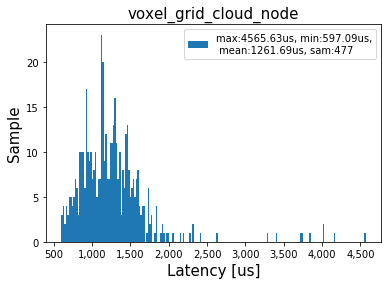

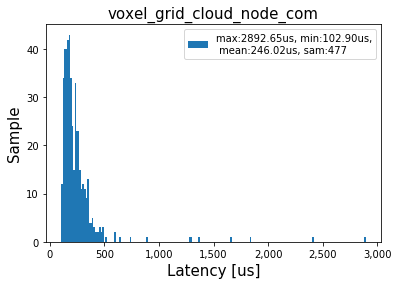

In [16]:
# callback duration of node: node name,topic name
node='voxel_grid_cloud_node'
topic='/lidars/points_fused'
cbduration7,title = cbd(node,topic)
graph(cbduration7,title)
# com latency
comlatency7,title=ps_com(node,topic)
graph(comlatency7,title)

In [75]:
# callback duration of node: node name,topic name
node='p2d_ndt_localizer_node'
topic='/lidars/points_fused_downsampled'
cbduration8,title = cbd(node,topic)
graph(cbduration8,title)
# com latency
comlatency8,title=ps_com(node,topic)
graph(comlatency8,title)

IndexError: list index out of range

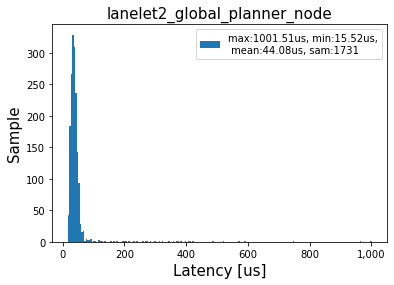

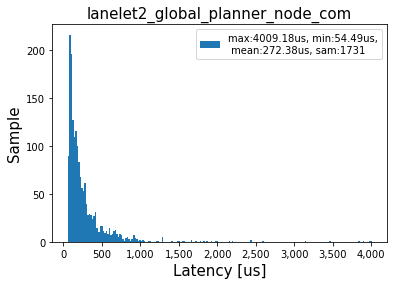

In [19]:
# callback duration of node: node name,topic name
node='lanelet2_global_planner_node'
topic='/tf'
cbduration9,title = cbd(node,topic)
graph(cbduration9,title)
# com latency
comlatency9,title=ps_com(node,topic)
graph(comlatency9,title)

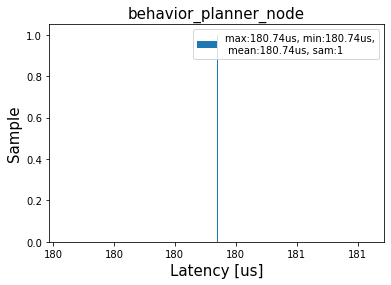

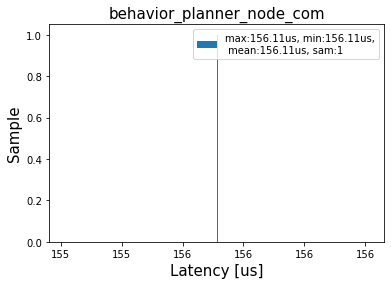

In [ ]:
# callback duration of node: node name,topic name
node='behavior_planner_node'
topic='/planning/global_path'
cbduration10,title = cbd(node,topic)
graph(cbduration10,title)
# com latency
comlatency10,title=ps_com(node,topic)
graph(comlatency10,title)

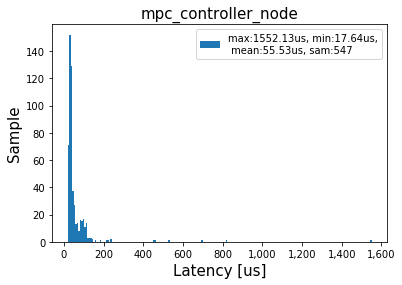

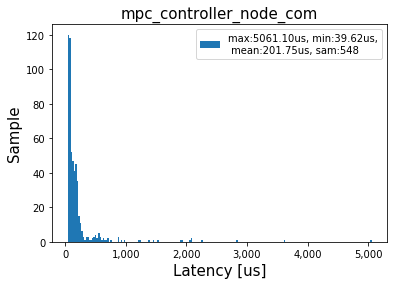

In [28]:
# callback duration of node: node name,topic name
node='mpc_controller_node'
topic='/planning/trajectory'
cbduration11,title = cbd(node,topic)
for i in cbduration11:
    if i > 200000:
        cbduration11.remove(i)
graph(cbduration11,title)
# com latency
comlatency11,title=ps_com(node,topic)
graph(comlatency11,title)

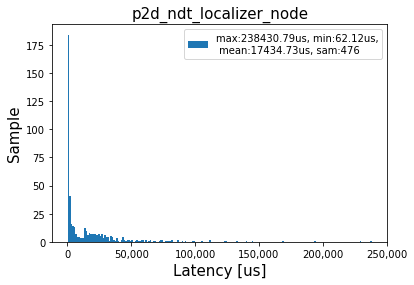

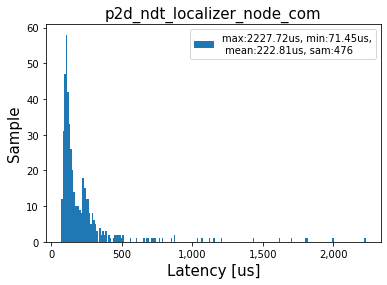

In [24]:
node='p2d_ndt_localizer_node'
topic='/lidars/points_fused_downsampled'
path = '/home/rei/reigit/avpdemo.txt'
f = open(path)
f.close()
with open(path) as f:
    l = f.readlines()

#node handle
S = l.index('Nodes:\n')
E = l.index('Publishers:\n')
node = [line for line in l[S:E] if node in line]
nodename= node[0].split()[4]
nodeh= node[0].split()[0]

S = l.index('Subscriptions:\n')
E = l.index('Subscription objects:\n')
subt = [line for line in l[S:E] if nodeh in line]
st=[line for line in subt if topic in line]
subscription_handle= st[0].split()[0]

#subscription_handle -> reference
S = l.index('Subscription objects:\n')
E = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S:E] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]

#reference -> callback_object
S = l.index('Callback objects:\n')
E = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S:E] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]

t=[]
with open(path) as f:
    l = f.readlines()
S = l.index('Callback instances:\n')
E = l.index('Lifecycle state machines:\n')  
l_XXX = [line for line in l[S:E] if callback_object in line]

# S = l.index('Callback symbols:\n')
# E = l.index('Callback instances:\n')  
# cb_name = [line for line in l[S:E] if callback_object in line]
# cb_name = ''.join(cb_name)
# cb_name = cb_name.split()[3]

cbd_ns = []
for i in l_XXX:
    cbd_ns.append(int(i.split()[3])) 
cbd_us = []
for i in cbd_ns:
    cbd_us.append(i/1000)

cbduration8= cbd_us
title = nodename
graph(cbduration8,title)


# com latency
node='p2d_ndt_localizer_node'
topic='/lidars/points_fused_downsampled'
path = '/home/rei/reigit/avpdemo.txt'
f = open(path)
f.close()
with open(path) as f:
    l = f.readlines()

#node handle
S = l.index('Nodes:\n')
E = l.index('Publishers:\n')
node = [line for line in l[S:E] if node in line]
nodename= node[0].split()[4]
nodeh= node[0].split()[0]

S = l.index('Subscriptions:\n')
E = l.index('Subscription objects:\n')
subt = [line for line in l[S:E] if nodeh in line]
st=[line for line in subt if topic in line]
subscription_handle= st[0].split()[0]

#subscription_handle -> reference
S = l.index('Subscription objects:\n')
E = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S:E] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]

#reference -> callback_object
S = l.index('Callback objects:\n')
E = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S:E] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]

cbh = str(hex(int(callback_object)))
cbhandle = cbh.upper().replace('X', 'x')

path = path = '/home/rei/reigit/rclcpp_subscribe.txt'
f = open(path)
f.close()
with open(path) as f:
    l = f.readlines()

com_latency_ns = []
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cbhandle):
        source = i.split("source_stamp = ")[1].split(",")[0]
        receive = i.split("received_stamp = ")[1].split(",")[0].split()[0]
        com = int(receive) - int(source)
        com_latency_ns.append(com)

com_latency_us = []
for i in com_latency_ns:
    com_latency_us.append(i/1000)
    
comlatency8 = com_latency_us
title = nodename+'_com'
graph(comlatency8,title)

In [ ]:
#確率分布の重ね合わせ
import numpy as np
import matplotlib.pyplot as plt
bin=50
x1= np.arange(bin,max(P12)+bin,bin)
#print(x1,len(x1))
x2= np.arange(bin,max(P34510)+bin,bin)
#print(x2,len(x2))
if len(x1) > len(x2):
    x=x1
else:
    x=x2
print('\n')
#P1
p1=[]
for i in x:
    l=0
    for j in P12:
        if (j < i)&(j > i-bin):
            l+=1
    l/= len(P12)
    p1.append(l)

#P2
p2=[]
for i in x:
    l=0
    for j in P34510:
        if (j < i)&(j > i-bin):
            l+=1
    l/= len(P34510)
    p2.append(l)

P = [] 
for i in range(len(x)):
    p12 = 0
    for t in range(i):
        p12+= p1[t]*(p2[i-t] + p2[i-t-1])/2.0        
    P.append(p12)

print(len(x))
print(len(P))
# fig, ax = plt.subplots(1, 1)
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# plt.title('End-to-end latency')
# plt.xlabel('Latency [us]')
# plt.ylabel('Distribution')
# #plt.xlim(0,200000)
# plt.bar(x,P)
# plt.show()
#print(x,len(x),len(P))
s = [P[i]*len(P) for i in range(len(P))]
#print(len(s),max(s),s)
#print(s)
Px=[]
k=0
for i in s:
    m=(x[k]-bin/2)
    if (i>0)&(i<1):
        Px.append(m)
    else:
        for j in range(int(i)):
            Px.append(m)
    k+=1
print(len(s))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(Px, bins=100)
plt.title('end-to-end latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
plt.savefig("e2ehist.pdf")

In [ ]:
w=0
print(type(x))
print(len(P))
for i in P:
    if i > 0.00001:
        w+=1
print(w)

h=0
for i in P:
    h+=i
print(h)
print(len(P))

In [ ]:
print(x)
print(x[0:3])
n=0
for j in x:
    if j<=100000:
      n+=1
print(n)

In [ ]:
sum=0
for k in P[0:n]:
    sum+=k
print(sum)